<a href="https://colab.research.google.com/github/stefaniemeliss/IADS_SC_2022_DecisionTrees/blob/main/GradientBoostingRegressor_IADS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Boosting for Regression**
### 1. Boston House Price dataset
### 2. House Sales in King County, USA






In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Boston House Price dataset


## Dataset for Regression



> **Dataset:**  [Boston house-price](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)



*   **Number of Instances:** 
    *   	506
*   **Number of Attributes:**
    *   13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

*   **Attribute Information:**
    *   CRIM per capita crime rate by town
    *   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    *   INDUS proportion of non-retail business acres per town
    *   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    *   NOX nitric oxides concentration (parts per 10 million)
    *   RM average number of rooms per dwelling
    *   AGE proportion of owner-occupied units built prior to 1940
    *   DIS weighted distances to five Boston employment centres
    *   RAD index of accessibility to radial highways
    *   TAX full-value property-tax rate per \$10,000
    *   PTRATIO pupil-teacher ratio by town
    *   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    *   LSTAT \% lower status of the population
    *   MEDV Median value of owner-occupied homes in \$1000’s






In [25]:
# Add liberaries 
from sklearn import datasets  # DATA
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import ensemble # To get Gradient Boosting regressor 
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To estimate CV predicted outputs
from sklearn.model_selection import cross_val_score # To estimate CV score


from sklearn.tree import export_graphviz # exporting the tree structure as dot file
from pydotplus.graphviz import graph_from_dot_data # export png image from dot file
from IPython.display import Image, SVG # Show the image within colab notebook
from graphviz import Source
import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd # for basic data exploration and manipulations 
import numpy as np # Numpy for data manipulations

from sklearn.model_selection import GridSearchCV # get gridsearch with cross validation
import warnings
warnings.filterwarnings('ignore')

### 1. Load Data

In [26]:
#load data and see meta info
boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

### 2. Explore Data


In [27]:
# print type and shape of data
print(type(boston.data))
print(type(boston.target))

print(boston.data.shape)
print(boston.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


### 3. Create Panda Dataframe and do data manipulations

In [28]:
dfReg = pd.DataFrame(boston.data, columns=boston.feature_names)
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
# Add target data to the panda dataframe
dfReg['target'] = boston.target
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 4. Split the data for Training and Testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(dfReg.drop(['target'],axis='columns'),boston.target,test_size=0.1,random_state=123)
print(X_train.shape)
print(X_test.shape)

(455, 13)
(51, 13)


### 5. Initialise a Gradient Boosting Regressor

In [31]:
gbRegressor = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1,
                                                   n_estimators=100, subsample=1.0, 
                                                   criterion='friedman_mse', 
                                                   min_samples_split=2, min_samples_leaf=1, 
                                                   min_weight_fraction_leaf=0.0, max_depth=3, 
                                                   min_impurity_decrease=0.0,
                                                   init=None, random_state=123, max_features=None, 
                                                   alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                                   warm_start=False, 
                                                   validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)

# sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# PARAMETERS
# loss: Loss function to be optimized. ‘squared_error’ refers to the squared error for regression. ‘absolute_error’ refers to the absolute error of regression and is a robust loss function. ‘huber’ is a combination of the two. ‘quantile’ allows quantile regression (use alpha to specify the quantile).
# learning_rate: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range (0.0, inf).
# n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. 
# subsample: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0].
# criterion: The function to measure the quality of a split. Supported criteria are ‘friedman_mse’ for the mean squared error with improvement score by Friedman, ‘squared_error’ for mean squared error. The default value of ‘friedman_mse’ is generally the best as it can provide a better approximation in some cases.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
# min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# max_depth: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables. 
# random_state: Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
# max_features: The number of features to consider when looking for the best split.
# max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
# validation_fraction: The proportion of training data to set aside as validation set for early stopping. Values must be in the range (0.0, 1.0). Only used if n_iter_no_change is set to an integer.
# n_iter_no_change: n_iter_no_change is used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations. The split is stratified. Values must be in the range [1, inf).
# tol: Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops. 
# ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.



> ***Let's dig into*** **[tree.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)**




### 6. Model Evaluation on Train data

In [32]:
CV_predicted = cross_val_predict(gbRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(gbRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)

Crossvalidation Coefficient of determination on training set : 0.8825938481801471


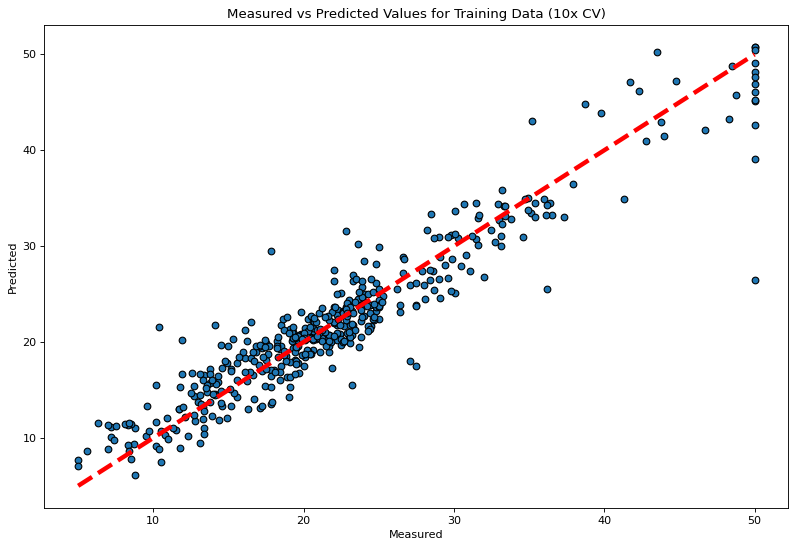

In [33]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7. Let's fit the GB model on Training data and perform prediction with the Test data 

In [34]:
gbRegressor_model = gbRegressor.fit(X_train,y_train)

y_predicted = gbRegressor_model.predict(X_test)

### 8. Model Evaluation on Test Data

In [35]:
r2_score = gbRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.788674966422266

Mean Squared Error on test set : 24.160834150175624


### 9. Visualisation

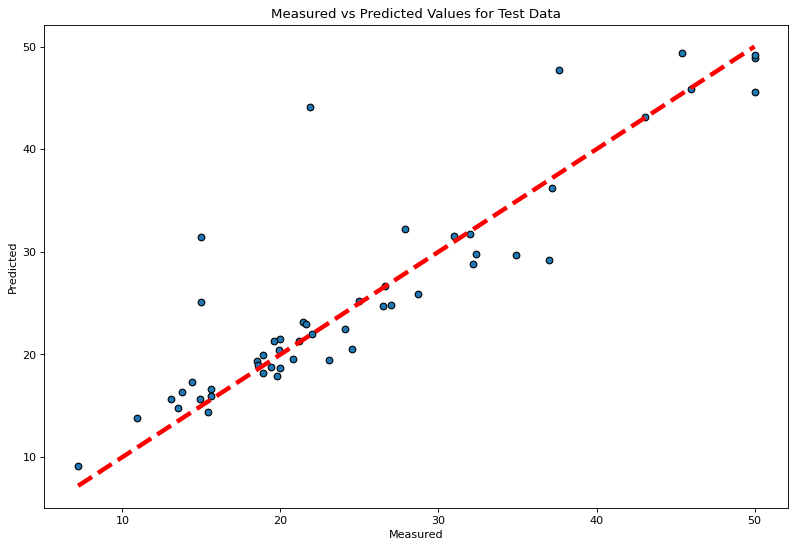

In [36]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

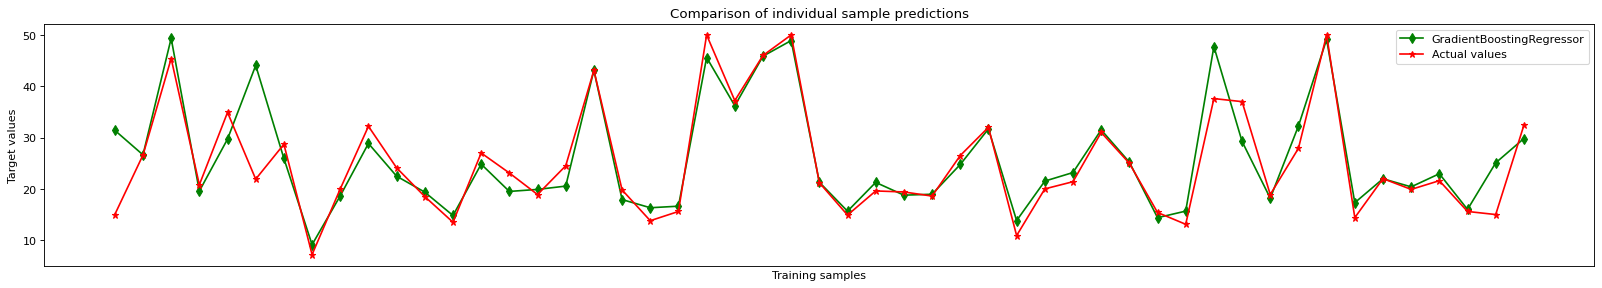

In [37]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='GradientBoostingRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

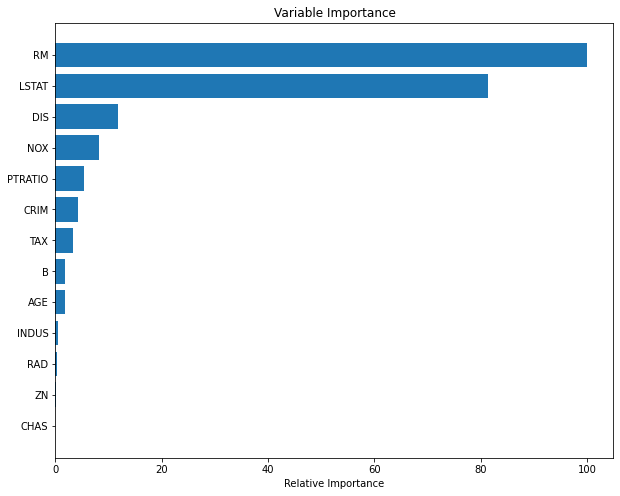

In [38]:
# Plot feature importance
feature_importance = gbRegressor_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()

### 10. Let's do Grid Search

In [39]:
#provide GB hyperparameters
gb_hyperparameters = {
    "n_estimators": [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
#     'loss' : ['ls', 'lad', 'huber', 'quantile'],
}

nfolds = 10 #number of folds for CV
gbRegressor = ensemble.GradientBoostingRegressor(random_state=123) #initialise GB classifier

# create Grid search object
gs_gb_rgr = GridSearchCV(gbRegressor, gb_hyperparameters, 
                          n_jobs=100, cv=nfolds)

In [40]:
gs_gb_rgr.fit(X_train, y_train) #fit the grid search object

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=100,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [50, 100]})

In [41]:
print(gs_gb_rgr.best_score_)
print(gs_gb_rgr.best_params_)

0.8825938481801471
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [42]:
best_parameters_gs = gs_gb_rgr.best_params_ #get the best parameters based on 10x CV grid search

### 11. Re-Initialise a Gradient Boosting Regressor

In [43]:
gbRegressor_best = ensemble.GradientBoostingRegressor(**best_parameters_gs) #intialise GB classifier with best set of parameters

### 12. Model Re-evaluation on Train data with best Parameters

In [44]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(gbRegressor_best, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(gbRegressor_best, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score with best parameters on train data: ",CV_score.mean())

Cross validation Score with best parameters on train data:  0.880021052460541


### 13. Model Re-evaluation on Test data with best Parameters

In [45]:
gbRegressor_best_mdl= gbRegressor_best.fit(X_train, y_train) #fit the best GB classifier with training data

y_predicted = gbRegressor_best_mdl.predict(X_test) #Predict the outcomes with best GB classifier for test data

In [46]:
mdl_score = gbRegressor_best_mdl.score(X_test,y_test) #model score (test data)
print ("Model Score with best parameters on test data:",mdl_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error with best parameters on test set :",mse_score)

Model Score with best parameters on test data: 0.7864384165863582

Mean Squared Error with best parameters on test set : 24.41653934865177


# 2. House Sales in King County, USA dataset
[see description here](https://www.kaggle.com/harlfoxem/housesalesprediction)


### 1. Load data

In [47]:
#load data from local drive
housePriceData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
housePriceData.shape

(21613, 21)

### 2. Explore Data


In [48]:
housePriceData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
housePriceData = housePriceData.drop(['id', 'date'], axis=1) #remove 'id' and 'date' variables
housePriceData.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
housePriceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [51]:
housePriceData.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 3. Split the data for Training and Testing

In [52]:
target = housePriceData['price'] #get the labels as targets and convert to numpy array
np.array(target, dtype=pd.Series)

array([221900.0, 538000.0, 180000.0, ..., 402101.0, 400000.0, 325000.0],
      dtype=object)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(housePriceData.drop(['price'],axis='columns'), target, test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)

(17290, 18)
(4323, 18)


### 4. Let's do Grid Search

In [54]:
#provide GB hyperparameters
gb_hyperparameters = {
    # "n_estimators": [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [1, 3],
#     'loss' : ['ls', 'lad', 'huber', 'quantile'],
}

nfolds = 10 #number of folds for CV
gbRegressor = ensemble.GradientBoostingRegressor(random_state=123) #initialise GB classifier

# create Grid search object
gs_gb_rgr = GridSearchCV(gbRegressor, gb_hyperparameters, 
                          n_jobs=50, cv=nfolds)

In [55]:
gs_gb_rgr.fit(X_train, y_train) #fit the grid search object

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=50,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [1, 3]})

In [56]:
print(gs_gb_rgr.best_score_)
print(gs_gb_rgr.best_params_)

0.8608812073131291
{'learning_rate': 0.1, 'max_depth': 3}


In [57]:
best_parameters_gs = gs_gb_rgr.best_params_ #get the best parameters based on 10x CV grid search

### 5. Initialise a Gradient Boosting Regressor

In [58]:
gbRegressor_best = ensemble.GradientBoostingRegressor(**best_parameters_gs, random_state=123) #intialise GB classifier with best set of parameters

### 6. Model Re-evaluation on Train data with best Parameters

In [59]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(gbRegressor_best, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(gbRegressor_best, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score with best parameters on train data: ",CV_score.mean())

Cross validation Score with best parameters on train data:  0.8608812073131291


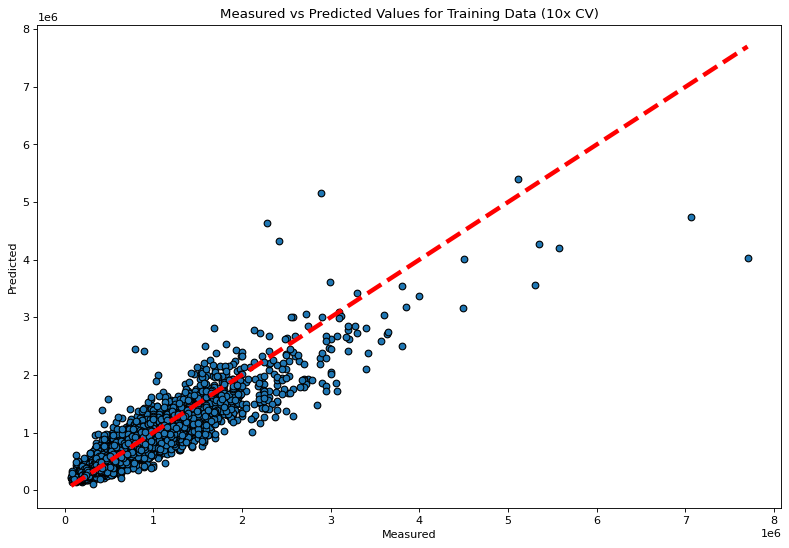

In [60]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7. Model Re-evaluation on Test data with best Parameters

In [61]:
gbRegressor_best_mdl= gbRegressor_best.fit(X_train, y_train) #fit the best GB classifier with training data

y_predicted = gbRegressor_best_mdl.predict(X_test) #Predict the outcomes with best GB classifier for test data

In [62]:
mdl_score = gbRegressor_best_mdl.score(X_test,y_test) #model score (test data)
print ("Model Score with best parameters on test data:",mdl_score)

model_error = 1- mdl_score
print ("\nModel Error with best parameters on test set :",model_error)

Model Score with best parameters on test data: 0.8844130756458197

Model Error with best parameters on test set : 0.11558692435418028


### 8. Visualisation

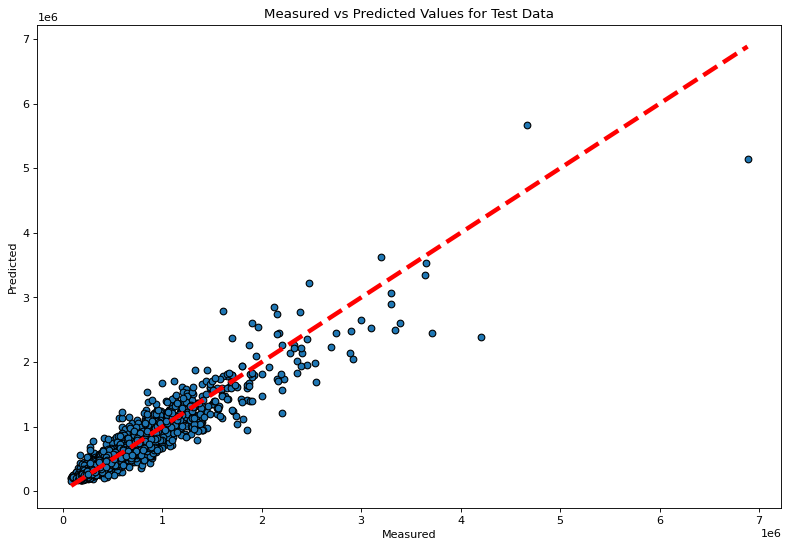

In [63]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

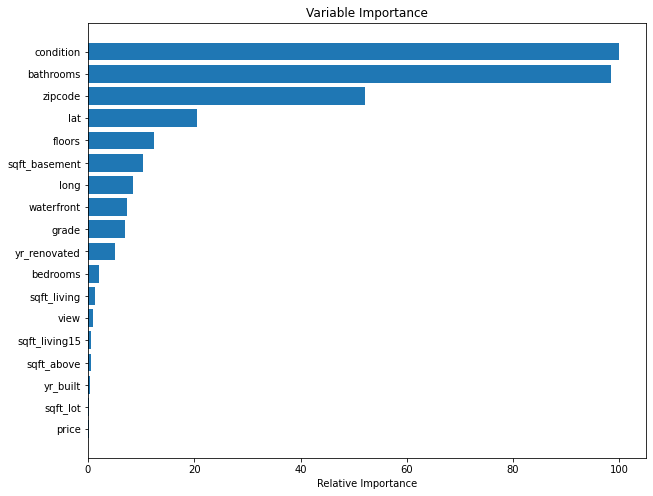

In [64]:
# Plot feature importance
feature_importance = gbRegressor_best_mdl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

array_features = np.asarray(list(housePriceData))
plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, array_features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()